Experiment with Tensorflow to build the same predictor

1. Rebuild the same model as the PyTorch one and see if they perform any different
2. Try more layers, different parameters, etc to learn a bit more
3. Stick in a GridSearchCV pipeline to see how it does with getting a better version
4. Save out the models as before to use in an application

Initial code setup comes from the [Tensorflow Tutorial](https://www.tensorflow.org/tutorials/keras/classification)

In [7]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [8]:
#  tf.config.experimental.list_physical_devices('GPU')

In [9]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

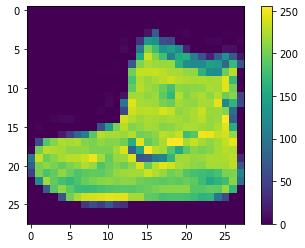

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


Preprocess the data - in this case it's scaling each of the pixel values from 0-1

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

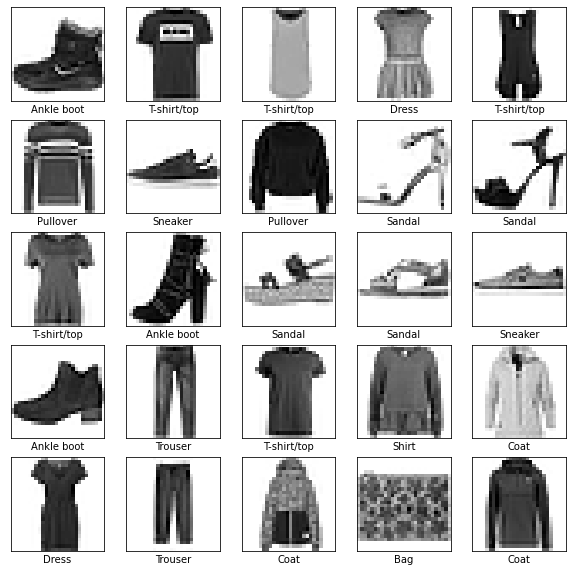

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


The example model is below - I'll be expanding on it later in the notebook (turning it into a CNN, experimenting with different layers)

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5015 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3788 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3131 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2817 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2689 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2568 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2477 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# for overfitting try a little L@ regularization

313/313 - 0s - loss: 0.3351 - accuracy: 0.8844

Test accuracy: 0.8844000101089478


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


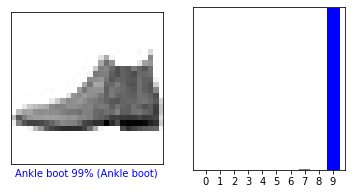

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


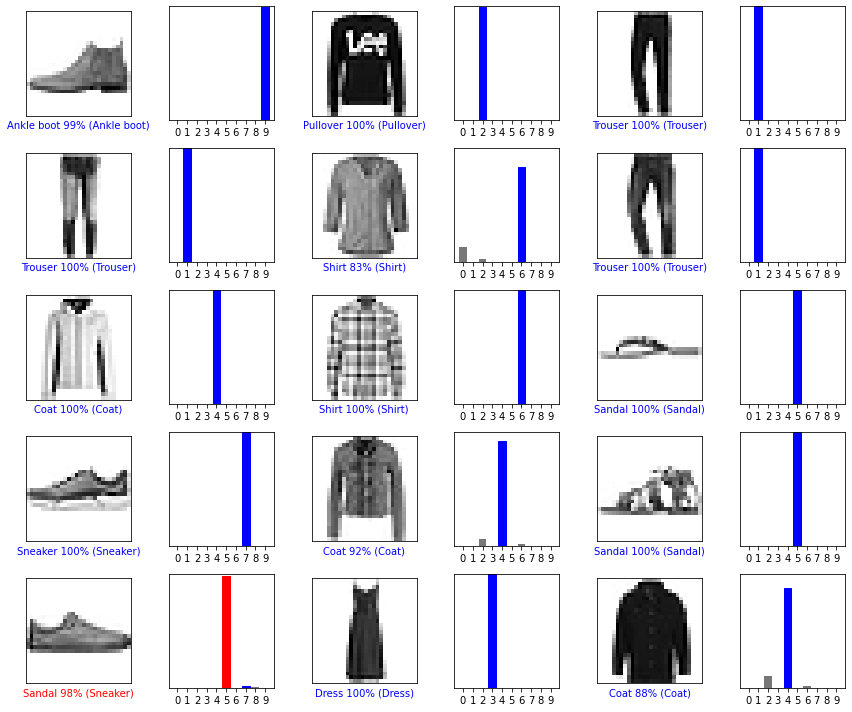

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


(28, 28)
(1, 28, 28)
[[1.8109781e-06 6.0059138e-15 9.9838865e-01 4.1913273e-10 1.4869933e-03
  5.4349437e-15 1.2260168e-04 1.2546644e-16 8.3540631e-12 4.7977166e-13]]


2

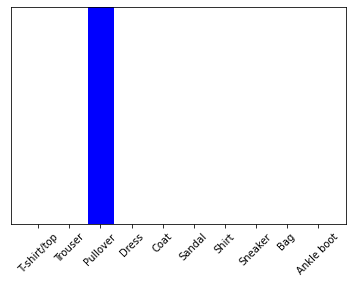

In [22]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
np.argmax(predictions_single[0])


In [23]:
train_images[0].shape

(28, 28)

In [24]:
train_images.shape

(60000, 28, 28)

In [25]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [26]:
# Mimic the format of the structure of the PyTorch model
batch_size = 100

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=5, activation='relu', input_shape=(28, 28,1), data_format='channels_last'))
model.add(keras.layers.MaxPooling2D(pool_size=2, strides=2))
model.add(keras.layers.Conv2D(filters=12, kernel_size=5, activation='relu'))# input_shape=(6,12, 12)))
model.add(keras.layers.MaxPooling2D(pool_size=2, strides=2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))#, input_shape=(12*4*4,)))
model.add(keras.layers.Dense(60, activation='relu'))
model.add(keras.layers.Dense(10))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 12)          1812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               23160     
_________________________________________________________________
dense_3 (Dense)              (None, 60)               

In [27]:
train_images[0].shape

(28, 28, 1)

In [28]:
# Commented out because I had to restart the kernel and didn't want to rerun this
# model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#              metrics=['accuracy'])

# history = model.fit(train_images,
#          train_labels,
#          batch_size=500,
#          epochs=100,
#          shuffle=True,
#          validation_data=(test_images, test_labels))
# # It's overfit, but I'll include overfitting on the below one

In [29]:
# Commented out because I had to restart the kernel and didn't want to rerun this
# model.save('saved_models/tf-mimic-3.h5') 

### Now that the testing is done, lets recreate the model in a way we can use it with scikit-learn and GridSearchCV 

In [30]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [31]:
#Wrapper function for the Keras CNN that will allow easier experimentation with GridSearchCV
def build_classifier(kernel_size=5, # kernel size of the Conv layers
                     max_pool_size=2, #Size of the MaxPool layers
                     pool_strides=2, # Stride of the MaxPool layers
                     filters=(6,12), #Filter size
                     dense_size=(120,60), #Size of the dense layers
                     learning_rate=0.001, # Learnig rate for Adam
                     dropout_d=0.0 # dropout rate in the dense layers
                    ): 
    
    # Starting model
    model = keras.models.Sequential()
    
    # Convolutional / pooling layers
    model.add(keras.layers.Conv2D(filters=filters[0], kernel_size=kernel_size, activation='relu', input_shape=(28, 28,1), data_format='channels_last'))
    model.add(keras.layers.MaxPooling2D(pool_size=max_pool_size, strides=pool_strides))
    model.add(keras.layers.Conv2D(filters=[1], kernel_size=kernel_size, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=max_pool_size, strides=pool_strides))

    # Dense layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(dropout_d))
    model.add(keras.layers.Dense(dense_size[0], activation='relu'))
    model.add(keras.layers.Dropout(dropout_d))
    model.add(keras.layers.Dense(dense_size[1], activation='relu'))
    model.add(keras.layers.Dropout(dropout_d))
    
    # Output layer
    model.add(keras.layers.Dense(10))
    
    # Compile the model
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
             metrics='accuracy'
                 )
    
    return model

In [32]:
earlystop_callback = keras.callbacks.EarlyStopping(
  monitor='val_loss',
  min_delta=0.0001,
  patience=3,
  restore_best_weights=True)

In [33]:
param_grid = {
    "kernel_size": [3,5],
    "max_pool_size": [2,3],
    "pool_strides": [1,2],
    "filters": [(6,12),(4,8)],
    "dense_size": [(120,60), (100,50)],
    "learning_rate": [0.005,0.001, 0.0005],
    "dropout_d": [0.0, 0.2],
    "batch_size": [100, 250, 500],
    "epochs": [100]
#     "shuffle": [True],
#     "callbacks": [[earlystop_callback]],
#     "validation_data": [(test_images, test_labels)]
}

In [34]:
# Call this with the default args, and those that should be overwritten with the param_grid will be (I think)
keras_model = KerasClassifier(
    build_fn=build_classifier,
    
    # The param_grid args to the build function
    kernel_size=5, # kernel size of the Conv layers
    max_pool_size=2, #Size of the MaxPool layers
    pool_strides=2, # Stride of the MaxPool layers
    filters=(6,12), #Filter size
    dense_size=(120,60), #Size of the dense layers
    learning_rate=0.001, # Learnig rate for Adam
    dropout_d=0.0, # dropout rate in the dense layers
    
    # The param_grid args to the fit function
    epochs = 50, # This should really be kept under control by the early stopping
    batch_size=100,
    
    # Other single args to the fit function
    shuffle=True, # Shuffle the traiing data
    callbacks=[earlystop_callback], # Utilize early stopping as defined above
    validation_data=(test_images, test_labels) # Use test data as validation data
) 

In [35]:
grid_search = GridSearchCV(
    estimator = keras_model,
    param_grid = param_grid,
    # Scoring will just be the default from the Keras model, aka Categorical cross entropy + accuracy
    cv = 3,
    n_jobs = -1,
    verbose = 10
)

In [36]:
# grid_search.fit(train_images, train_labels)

In [37]:
import sklearn
sklearn.__version__

'0.21.2'

## Issue Summary:
There's a [known](https://github.com/keras-team/keras/issues/13586) [bug](https://github.com/scikit-learn/scikit-learn/issues/15722) That for me for whatever reason isn't fixed by reverting the sklearn version. Instead, what I'll be doing is running a knockoff of a gridsearch, without CV (but with teh validation set) of teh parameter sets

In [38]:
import os
os.cpu_count()

4

In [39]:
earlystop_callback = keras.callbacks.EarlyStopping(
  monitor='val_loss',
  min_delta=0.0001,
  patience=3,
  restore_best_weights=True)

In [40]:
# NOTE: The below cell is definitely duplicating the train/test images and labels, so just pass those in separately

In [41]:
import itertools
param_grid = {
    "kernel_size": [3,5],
    "max_pool_size": [2],
    "pool_strides": [1,2],
    "filters": [(6,12)],
    "dense_size": [(120,60)],
    "learning_rate": [0.001, 0.0005],
    "dropout_d": [0.0, 0.2],
    "batch_size": [100, 250, 500],
    "epochs": [100],
    "shuffle": [True]
}
single_params = {
    # Since none of these change, just pass them in independently
    "callbacks": [[earlystop_callback]],
    "test_images": test_images,
    "test_labels": test_labels,
    "train_images": train_images,
    "train_labels": train_labels
}

keys, values = zip(*param_grid.items())
permutations_dicts = [dict(zip(keys, v)) for v in itertools.product(*values)]
for idx, d in enumerate(permutations_dicts):
    name = "model-"+str(idx)
    d["model_name"] = name

len(permutations_dicts)

48

In [42]:
# Because of the way pool works, have to define this in a separate function then import it
def build_and_fit_model(
                        # Positional, previously created objects
                        model_name="nonegiven",
                        train_images=None,
                        train_labels=None,
                        test_images=None,
                        test_labels=None,
                        callbacks=None,
                        kernel_size=5, # kernel size of the Conv layers
                        max_pool_size=2, #Size of the MaxPool layers
                        pool_strides=2, # Stride of the MaxPool layers
                        filters=(6,12), #Filter size
                        dense_size=(120,60), #Size of the dense layers
                        learning_rate=0.001, # Learnig rate for Adam
                        dropout_d=0.0, # dropout rate in the dense layers
                        batch_size=500,
                        shuffle=True,
                        epochs=100
                    ): 
    
    # Starting model
    model = keras.models.Sequential()
    
    # Convolutional / pooling layers
    model.add(keras.layers.Conv2D(filters=filters[0], kernel_size=kernel_size, activation='relu', input_shape=(28, 28,1), data_format='channels_last'))
    model.add(keras.layers.MaxPooling2D(pool_size=max_pool_size, strides=pool_strides))
    model.add(keras.layers.Conv2D(filters=filters[1], kernel_size=kernel_size, activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=max_pool_size, strides=pool_strides))

    # Dense layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(dropout_d))
    model.add(keras.layers.Dense(dense_size[0], activation='relu'))
    model.add(keras.layers.Dropout(dropout_d))
    model.add(keras.layers.Dense(dense_size[1], activation='relu'))
    model.add(keras.layers.Dropout(dropout_d))
    
    # Output layer
    model.add(keras.layers.Dense(10))
    
    # Compile the model
    model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
             metrics='accuracy'
                 )
    
    # Fit the model
    history = model.fit(train_images,
         train_labels,
         batch_size=batch_size,
         epochs=epochs,
         shuffle=shuffle,
         callbacks=callbacks,
         validation_data=(test_images, test_labels))
    
    #save the model and the parameters of the model to files
    path="./saved_models/fake-gridsearch-saves/" + model_name
    model.save(f'{path}.h5')
    evals = model.evaluate(test_images, test_labels)
    
    with open('./saved_models/fake-gridsearch-saves/results-tf.txt', 'a') as f:
        f.write(f"{model_name}: {evals}")
    
    return model

In [43]:
# from build_and_fit_model import build_and_fit_model
# build_and_fit_model

In [44]:
test_params = permutations_dicts[0:2]
full_params = [{**x, **single_params} for x in permutations_dicts]

In [45]:
len(full_params)

48

In [48]:
full_params[4]

{'kernel_size': 3,
 'max_pool_size': 2,
 'pool_strides': 1,
 'filters': (6, 12),
 'dense_size': (120, 60),
 'learning_rate': 0.001,
 'dropout_d': 0.2,
 'batch_size': 250,
 'epochs': 100,
 'shuffle': True,
 'model_name': 'model-4',
 'callbacks': [[<tensorflow.python.keras.callbacks.EarlyStopping at 0x1760900ce10>]],
 'test_images': array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
   

In [70]:
# build_and_fit_model(**test_params, **single_params)
# Works great on a single one! now to get it done with multiprocessing

In [71]:
all_models = []
for params in full_params:
    model = build_and_fit_model(**params)
    all_models.append(model)

Epoch 1/100
600/600 [==============================] - 32s 53ms/step - loss: 0.4705 - accuracy: 0.8303 - val_loss: 0.3685 - val_accuracy: 0.8678
Epoch 2/100
600/600 [==============================] - 32s 53ms/step - loss: 0.3180 - accuracy: 0.8843 - val_loss: 0.3335 - val_accuracy: 0.8789
Epoch 3/100
600/600 [==============================] - 32s 53ms/step - loss: 0.2715 - accuracy: 0.9004 - val_loss: 0.2899 - val_accuracy: 0.8922
Epoch 4/100
600/600 [==============================] - 31s 52ms/step - loss: 0.2427 - accuracy: 0.9100 - val_loss: 0.2833 - val_accuracy: 0.8974
Epoch 5/100
600/600 [==============================] - 32s 53ms/step - loss: 0.2151 - accuracy: 0.9197 - val_loss: 0.2917 - val_accuracy: 0.8940
Epoch 6/100
600/600 [==============================] - 32s 54ms/step - loss: 0.1946 - accuracy: 0.9276 - val_loss: 0.2667 - val_accuracy: 0.9019
Epoch 7/100
600/600 [==============================] - 32s 54ms/step - loss: 0.1749 - accuracy: 0.9339 - val_loss: 0.2706 - val_ac

Epoch 3/100
240/240 [==============================] - 28s 115ms/step - loss: 0.3827 - accuracy: 0.8631 - val_loss: 0.3341 - val_accuracy: 0.8800
Epoch 4/100
240/240 [==============================] - 28s 115ms/step - loss: 0.3480 - accuracy: 0.8749 - val_loss: 0.3202 - val_accuracy: 0.8831
Epoch 5/100
240/240 [==============================] - 28s 115ms/step - loss: 0.3243 - accuracy: 0.8827 - val_loss: 0.2975 - val_accuracy: 0.8931
Epoch 6/100
240/240 [==============================] - 27s 114ms/step - loss: 0.3073 - accuracy: 0.8882 - val_loss: 0.2944 - val_accuracy: 0.8944
Epoch 7/100
240/240 [==============================] - 28s 115ms/step - loss: 0.2944 - accuracy: 0.8925 - val_loss: 0.2884 - val_accuracy: 0.8946
Epoch 8/100
240/240 [==============================] - 27s 114ms/step - loss: 0.2769 - accuracy: 0.8992 - val_loss: 0.2928 - val_accuracy: 0.8944
Epoch 9/100
240/240 [==============================] - 28s 115ms/step - loss: 0.2670 - accuracy: 0.9014 - val_loss: 0.2666 -

240/240 [==============================] - 28s 115ms/step - loss: 0.2420 - accuracy: 0.9108 - val_loss: 0.2640 - val_accuracy: 0.9025
Epoch 12/100
240/240 [==============================] - 28s 115ms/step - loss: 0.2323 - accuracy: 0.9158 - val_loss: 0.2585 - val_accuracy: 0.9056
Epoch 13/100
240/240 [==============================] - 28s 115ms/step - loss: 0.2246 - accuracy: 0.9175 - val_loss: 0.2561 - val_accuracy: 0.9076
Epoch 14/100
240/240 [==============================] - 28s 115ms/step - loss: 0.2185 - accuracy: 0.9189 - val_loss: 0.2512 - val_accuracy: 0.9081
Epoch 15/100
240/240 [==============================] - 27s 115ms/step - loss: 0.2101 - accuracy: 0.9231 - val_loss: 0.2457 - val_accuracy: 0.9112
Epoch 16/100
240/240 [==============================] - 28s 115ms/step - loss: 0.2023 - accuracy: 0.9255 - val_loss: 0.2555 - val_accuracy: 0.9122
Epoch 17/100
240/240 [==============================] - 28s 115ms/step - loss: 0.1979 - accuracy: 0.9267 - val_loss: 0.2430 - val_a

600/600 [==============================] - 10s 17ms/step - loss: 0.3363 - accuracy: 0.8752 - val_loss: 0.3022 - val_accuracy: 0.8873
Epoch 13/100
600/600 [==============================] - 10s 16ms/step - loss: 0.3285 - accuracy: 0.8785 - val_loss: 0.3084 - val_accuracy: 0.8859
Epoch 14/100
600/600 [==============================] - 10s 16ms/step - loss: 0.3252 - accuracy: 0.8785 - val_loss: 0.2982 - val_accuracy: 0.8914
Epoch 15/100
600/600 [==============================] - 10s 16ms/step - loss: 0.3183 - accuracy: 0.8810 - val_loss: 0.3004 - val_accuracy: 0.8889
Epoch 16/100
600/600 [==============================] - 10s 16ms/step - loss: 0.3133 - accuracy: 0.8833 - val_loss: 0.2910 - val_accuracy: 0.8925
Epoch 17/100
600/600 [==============================] - 10s 16ms/step - loss: 0.3087 - accuracy: 0.8849 - val_loss: 0.2950 - val_accuracy: 0.8912
Epoch 18/100
600/600 [==============================] - 10s 16ms/step - loss: 0.3061 - accuracy: 0.8857 - val_loss: 0.2899 - val_accuracy

Epoch 42/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2770 - accuracy: 0.8970 - val_loss: 0.2812 - val_accuracy: 0.8953
Epoch 43/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2708 - accuracy: 0.8984 - val_loss: 0.2801 - val_accuracy: 0.8984
Epoch 44/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2706 - accuracy: 0.8979 - val_loss: 0.2747 - val_accuracy: 0.8988
Epoch 45/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2702 - accuracy: 0.8989 - val_loss: 0.2762 - val_accuracy: 0.8999
Epoch 46/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2694 - accuracy: 0.8984 - val_loss: 0.2738 - val_accuracy: 0.9015
Epoch 47/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2683 - accuracy: 0.8998 - val_loss: 0.2797 - val_accuracy: 0.8987
Epoch 48/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2665 - accuracy: 0.8990 - val_loss: 0.2763 - val_ac

120/120 [==============================] - 8s 69ms/step - loss: 0.3142 - accuracy: 0.8863 - val_loss: 0.3520 - val_accuracy: 0.8711
Epoch 25/100
120/120 [==============================] - 8s 70ms/step - loss: 0.3121 - accuracy: 0.8877 - val_loss: 0.3509 - val_accuracy: 0.8727
Epoch 26/100
120/120 [==============================] - 8s 70ms/step - loss: 0.3078 - accuracy: 0.8895 - val_loss: 0.3478 - val_accuracy: 0.8731
Epoch 27/100
120/120 [==============================] - 8s 69ms/step - loss: 0.3055 - accuracy: 0.8891 - val_loss: 0.3474 - val_accuracy: 0.8737
Epoch 28/100
120/120 [==============================] - 8s 70ms/step - loss: 0.3008 - accuracy: 0.8907 - val_loss: 0.3465 - val_accuracy: 0.8721
Epoch 29/100
120/120 [==============================] - 8s 70ms/step - loss: 0.2976 - accuracy: 0.8921 - val_loss: 0.3426 - val_accuracy: 0.8737
Epoch 30/100
120/120 [==============================] - 8s 69ms/step - loss: 0.2934 - accuracy: 0.8932 - val_loss: 0.3394 - val_accuracy: 0.876

240/240 [==============================] - 8s 35ms/step - loss: 0.2809 - accuracy: 0.8947 - val_loss: 0.2760 - val_accuracy: 0.8995
Epoch 53/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2825 - accuracy: 0.8960 - val_loss: 0.2744 - val_accuracy: 0.8994
Epoch 54/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2831 - accuracy: 0.8952 - val_loss: 0.2743 - val_accuracy: 0.9021
Epoch 55/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2770 - accuracy: 0.8976 - val_loss: 0.2720 - val_accuracy: 0.9012
Epoch 56/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2770 - accuracy: 0.8970 - val_loss: 0.2693 - val_accuracy: 0.9034
Epoch 57/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2740 - accuracy: 0.8979 - val_loss: 0.2734 - val_accuracy: 0.9009
Epoch 58/100
240/240 [==============================] - 8s 35ms/step - loss: 0.2726 - accuracy: 0.8996 - val_loss: 0.2713 - val_accuracy: 0.902

120/120 [==============================] - 8s 70ms/step - loss: 0.3226 - accuracy: 0.8792 - val_loss: 0.3002 - val_accuracy: 0.8871
Epoch 50/100
120/120 [==============================] - 8s 70ms/step - loss: 0.3192 - accuracy: 0.8820 - val_loss: 0.2986 - val_accuracy: 0.8888
Epoch 51/100
120/120 [==============================] - 8s 69ms/step - loss: 0.3207 - accuracy: 0.8813 - val_loss: 0.2985 - val_accuracy: 0.8899
Epoch 52/100
120/120 [==============================] - 8s 70ms/step - loss: 0.3170 - accuracy: 0.8823 - val_loss: 0.2953 - val_accuracy: 0.8904
Epoch 53/100
120/120 [==============================] - 8s 70ms/step - loss: 0.3177 - accuracy: 0.8821 - val_loss: 0.2940 - val_accuracy: 0.8912
Epoch 54/100
120/120 [==============================] - 8s 69ms/step - loss: 0.3147 - accuracy: 0.8840 - val_loss: 0.2953 - val_accuracy: 0.8893
Epoch 55/100
120/120 [==============================] - 8s 70ms/step - loss: 0.3122 - accuracy: 0.8837 - val_loss: 0.2950 - val_accuracy: 0.890

Epoch 2/100
600/600 [==============================] - 33s 55ms/step - loss: 0.3925 - accuracy: 0.8600 - val_loss: 0.3472 - val_accuracy: 0.8767
Epoch 3/100
600/600 [==============================] - 32s 54ms/step - loss: 0.3404 - accuracy: 0.8773 - val_loss: 0.3065 - val_accuracy: 0.8894
Epoch 4/100
600/600 [==============================] - 32s 54ms/step - loss: 0.3125 - accuracy: 0.8882 - val_loss: 0.2984 - val_accuracy: 0.8886
Epoch 5/100
600/600 [==============================] - 32s 54ms/step - loss: 0.2900 - accuracy: 0.8942 - val_loss: 0.2966 - val_accuracy: 0.8893
Epoch 6/100
600/600 [==============================] - 32s 54ms/step - loss: 0.2738 - accuracy: 0.8992 - val_loss: 0.2795 - val_accuracy: 0.8965
Epoch 7/100
600/600 [==============================] - 32s 54ms/step - loss: 0.2582 - accuracy: 0.9061 - val_loss: 0.2802 - val_accuracy: 0.8952
Epoch 8/100
600/600 [==============================] - 32s 54ms/step - loss: 0.2475 - accuracy: 0.9090 - val_loss: 0.2757 - val_ac

600/600 [==============================] - 33s 55ms/step - loss: 0.4699 - accuracy: 0.8310 - val_loss: 0.3827 - val_accuracy: 0.8618
Epoch 3/100
600/600 [==============================] - 33s 54ms/step - loss: 0.4031 - accuracy: 0.8552 - val_loss: 0.3641 - val_accuracy: 0.8675
Epoch 4/100
600/600 [==============================] - 33s 55ms/step - loss: 0.3642 - accuracy: 0.8693 - val_loss: 0.3253 - val_accuracy: 0.8847
Epoch 5/100
600/600 [==============================] - 33s 54ms/step - loss: 0.3401 - accuracy: 0.8775 - val_loss: 0.3182 - val_accuracy: 0.8860
Epoch 6/100
600/600 [==============================] - 33s 54ms/step - loss: 0.3180 - accuracy: 0.8851 - val_loss: 0.3011 - val_accuracy: 0.8898
Epoch 7/100
600/600 [==============================] - 33s 55ms/step - loss: 0.3021 - accuracy: 0.8906 - val_loss: 0.2917 - val_accuracy: 0.8953
Epoch 8/100
600/600 [==============================] - 33s 55ms/step - loss: 0.2859 - accuracy: 0.8958 - val_loss: 0.2895 - val_accuracy: 0.89

Epoch 18/100
120/120 [==============================] - 26s 214ms/step - loss: 0.2555 - accuracy: 0.9071 - val_loss: 0.2701 - val_accuracy: 0.8998
Epoch 19/100
120/120 [==============================] - 26s 214ms/step - loss: 0.2532 - accuracy: 0.9084 - val_loss: 0.2675 - val_accuracy: 0.9026
Epoch 20/100
120/120 [==============================] - 26s 214ms/step - loss: 0.2436 - accuracy: 0.9113 - val_loss: 0.2630 - val_accuracy: 0.9046
Epoch 21/100
120/120 [==============================] - 26s 214ms/step - loss: 0.2403 - accuracy: 0.9132 - val_loss: 0.2613 - val_accuracy: 0.9045
Epoch 22/100
120/120 [==============================] - 26s 214ms/step - loss: 0.2360 - accuracy: 0.9142 - val_loss: 0.2602 - val_accuracy: 0.9069
Epoch 23/100
120/120 [==============================] - 26s 214ms/step - loss: 0.2296 - accuracy: 0.9155 - val_loss: 0.2596 - val_accuracy: 0.9062
Epoch 24/100
120/120 [==============================] - 26s 214ms/step - loss: 0.2265 - accuracy: 0.9171 - val_loss: 0

Epoch 27/100
240/240 [==============================] - 10s 40ms/step - loss: 0.2221 - accuracy: 0.9187 - val_loss: 0.3092 - val_accuracy: 0.8883
Epoch 28/100
240/240 [==============================] - 10s 41ms/step - loss: 0.2196 - accuracy: 0.9187 - val_loss: 0.3056 - val_accuracy: 0.8921
Epoch 29/100
313/313 [==============================] - 1s 4ms/step - loss: 0.3014 - accuracy: 0.8938
Epoch 1/100
120/120 [==============================] - 10s 81ms/step - loss: 0.9354 - accuracy: 0.6776 - val_loss: 0.6267 - val_accuracy: 0.7699
Epoch 2/100
120/120 [==============================] - 9s 79ms/step - loss: 0.5611 - accuracy: 0.7904 - val_loss: 0.5443 - val_accuracy: 0.7993
Epoch 3/100
120/120 [==============================] - 10s 80ms/step - loss: 0.4917 - accuracy: 0.8201 - val_loss: 0.4951 - val_accuracy: 0.8204
Epoch 4/100
120/120 [==============================] - 10s 80ms/step - loss: 0.4535 - accuracy: 0.8375 - val_loss: 0.4638 - val_accuracy: 0.8336
Epoch 5/100
120/120 [======

Epoch 29/100
120/120 [==============================] - 10s 80ms/step - loss: 0.3224 - accuracy: 0.8818 - val_loss: 0.3095 - val_accuracy: 0.8879
Epoch 30/100
120/120 [==============================] - 10s 79ms/step - loss: 0.3173 - accuracy: 0.8820 - val_loss: 0.2968 - val_accuracy: 0.8902
Epoch 31/100
120/120 [==============================] - 10s 80ms/step - loss: 0.3156 - accuracy: 0.8838 - val_loss: 0.3012 - val_accuracy: 0.8888
Epoch 32/100
120/120 [==============================] - 10s 80ms/step - loss: 0.3108 - accuracy: 0.8859 - val_loss: 0.3018 - val_accuracy: 0.8878
Epoch 33/100
120/120 [==============================] - 9s 79ms/step - loss: 0.3122 - accuracy: 0.8847 - val_loss: 0.2944 - val_accuracy: 0.8915
Epoch 34/100
120/120 [==============================] - 10s 80ms/step - loss: 0.3093 - accuracy: 0.8849 - val_loss: 0.2973 - val_accuracy: 0.8916
Epoch 35/100
120/120 [==============================] - 10s 80ms/step - loss: 0.3048 - accuracy: 0.8878 - val_loss: 0.2936 - 

240/240 [==============================] - 10s 40ms/step - loss: 0.3086 - accuracy: 0.8893 - val_loss: 0.3386 - val_accuracy: 0.8808
Epoch 18/100
240/240 [==============================] - 10s 42ms/step - loss: 0.3020 - accuracy: 0.8904 - val_loss: 0.3304 - val_accuracy: 0.8854
Epoch 19/100
240/240 [==============================] - 10s 40ms/step - loss: 0.2974 - accuracy: 0.8936 - val_loss: 0.3364 - val_accuracy: 0.8788
Epoch 20/100
240/240 [==============================] - 10s 40ms/step - loss: 0.2919 - accuracy: 0.8956 - val_loss: 0.3273 - val_accuracy: 0.8825
Epoch 21/100
240/240 [==============================] - 10s 41ms/step - loss: 0.2881 - accuracy: 0.8962 - val_loss: 0.3297 - val_accuracy: 0.8819
Epoch 22/100
240/240 [==============================] - 10s 40ms/step - loss: 0.2838 - accuracy: 0.8972 - val_loss: 0.3206 - val_accuracy: 0.8885
Epoch 23/100
240/240 [==============================] - 10s 41ms/step - loss: 0.2773 - accuracy: 0.9000 - val_loss: 0.3284 - val_accuracy

600/600 [==============================] - 11s 19ms/step - loss: 0.5995 - accuracy: 0.7737 - val_loss: 0.4946 - val_accuracy: 0.8134
Epoch 3/100
600/600 [==============================] - 11s 19ms/step - loss: 0.5313 - accuracy: 0.8032 - val_loss: 0.4459 - val_accuracy: 0.8384
Epoch 4/100
600/600 [==============================] - 11s 19ms/step - loss: 0.4892 - accuracy: 0.8198 - val_loss: 0.4135 - val_accuracy: 0.8484
Epoch 5/100
600/600 [==============================] - 11s 19ms/step - loss: 0.4555 - accuracy: 0.8334 - val_loss: 0.3899 - val_accuracy: 0.8581
Epoch 6/100
600/600 [==============================] - 11s 19ms/step - loss: 0.4333 - accuracy: 0.8408 - val_loss: 0.3693 - val_accuracy: 0.8615
Epoch 7/100
600/600 [==============================] - 11s 19ms/step - loss: 0.4162 - accuracy: 0.8487 - val_loss: 0.3652 - val_accuracy: 0.8646
Epoch 8/100
600/600 [==============================] - 11s 19ms/step - loss: 0.4008 - accuracy: 0.8534 - val_loss: 0.3552 - val_accuracy: 0.87

Epoch 18/100
240/240 [==============================] - 10s 41ms/step - loss: 0.3512 - accuracy: 0.8707 - val_loss: 0.3227 - val_accuracy: 0.8823
Epoch 19/100
240/240 [==============================] - 10s 41ms/step - loss: 0.3480 - accuracy: 0.8718 - val_loss: 0.3183 - val_accuracy: 0.8816
Epoch 20/100
240/240 [==============================] - 10s 40ms/step - loss: 0.3429 - accuracy: 0.8736 - val_loss: 0.3154 - val_accuracy: 0.8829
Epoch 21/100
240/240 [==============================] - 10s 40ms/step - loss: 0.3383 - accuracy: 0.8767 - val_loss: 0.3141 - val_accuracy: 0.8842
Epoch 22/100
240/240 [==============================] - 10s 40ms/step - loss: 0.3347 - accuracy: 0.8749 - val_loss: 0.3116 - val_accuracy: 0.8834
Epoch 23/100
240/240 [==============================] - 10s 40ms/step - loss: 0.3328 - accuracy: 0.8787 - val_loss: 0.3089 - val_accuracy: 0.8857
Epoch 24/100
240/240 [==============================] - 10s 40ms/step - loss: 0.3308 - accuracy: 0.8777 - val_loss: 0.3056 -

In [72]:
all_models

In [73]:
all_model_results = []
for cur_model in all_models:
    cur_model_results = {}
    cur_model_results['model'] = cur_model
    cur_model_results['train_eval'] = cur_model.evaluate(train_images, train_labels)
    cur_model_results['test_eval'] = cur_model.evaluate(test_images, test_labels)
    all_model_results.append(cur_model_results)

313/313 [==============================] - 1s 4ms/step - loss: 0.2898 - accuracy: 0.8930


In [79]:
import pandas as pd
all_df = pd.DataFrame(all_model_results)
all_df[['train_loss','train_acc']] = pd.DataFrame(all_df.train_eval.tolist(), index= all_df.index)
all_df[['test_loss','test_acc']] = pd.DataFrame(all_df.test_eval.tolist(), index= all_df.index)

In [80]:
all_df

,model,train_eval,test_eval,train_loss,train_acc,test_loss,test_acc
0,<tensorflow.python.keras.engine.sequential.Seq...,"[0.16868141293525696, 0.9378499984741211]","[0.26669758558273315, 0.9018999934196472]",0.168681,0.937850,0.266698,0.9019
1,<tensorflow.python.keras.engine.sequential.Seq...,"[0.15938624739646912, 0.9430500268936157]","[0.2670109272003174, 0.904699981212616]",0.159386,0.943050,0.267011,0.9047
2,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1417781561613083, 0.948366641998291]","[0.25698399543762207, 0.9108999967575073]",0.141778,0.948367,0.256984,0.9109
3,<tensorflow.python.keras.engine.sequential.Seq...,"[0.15062175691127777, 0.9443666934967041]","[0.252878874540329, 0.909500002861023]",0.150622,0.944367,0.252879,0.9095
4,<tensorflow.python.keras.engine.sequential.Seq...,"[0.13222971558570862, 0.9526333212852478]","[0.24787791073322296, 0.9126999974250793]",0.132230,0.952633,0.247878,0.9127
5,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1857813447713852, 0.930899977684021]","[0.25688549876213074, 0.9057000279426575]",0.185781,0.930900,0.256885,0.9057
6,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1465650051832199, 0.9471666812896729]","[0.24840134382247925, 0.9114999771118164]",0.146565,0.947167,0.248401,0.9115
7,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1708768606185913, 0.9378499984741211]","[0.2613731920719147, 0.9070000052452087]",0.170877,0.937850,0.261373,0.9070
8,<tensorflow.python.keras.engine.sequential.Seq...,"[0.22205980122089386, 0.92166668176651]","[0.28667232394218445, 0.8970999717712402]",0.222060,0.921667,0.286672,0.8971
9,<tensorflow.python.keras.engine.sequential.Seq...,"[0.12658622860908508, 0.9560166597366333]","[0.24576333165168762, 0.9114999771118164]",0.126586,0.956017,0.245763,0.9115


#### TODO setup similar decisions as the Torch notebook - best test_acc, lowest loss, train one, etc

In [81]:
all_df.sort_values(by=['test_acc'], ascending=False)

,model,train_eval,test_eval,train_loss,train_acc,test_loss,test_acc
4,<tensorflow.python.keras.engine.sequential.Seq...,"[0.13222971558570862, 0.9526333212852478]","[0.24787791073322296, 0.9126999974250793]",0.132230,0.952633,0.247878,0.9127
10,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1421215534210205, 0.9477333426475525]","[0.24299895763397217, 0.9117000102996826]",0.142122,0.947733,0.242999,0.9117
9,<tensorflow.python.keras.engine.sequential.Seq...,"[0.12658622860908508, 0.9560166597366333]","[0.24576333165168762, 0.9114999771118164]",0.126586,0.956017,0.245763,0.9115
6,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1465650051832199, 0.9471666812896729]","[0.24840134382247925, 0.9114999771118164]",0.146565,0.947167,0.248401,0.9115
35,<tensorflow.python.keras.engine.sequential.Seq...,"[0.15237271785736084, 0.9448999762535095]","[0.24747571349143982, 0.911300003528595]",0.152373,0.944900,0.247476,0.9113
33,<tensorflow.python.keras.engine.sequential.Seq...,"[0.14446735382080078, 0.948033332824707]","[0.25142455101013184, 0.9111999869346619]",0.144467,0.948033,0.251425,0.9112
2,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1417781561613083, 0.948366641998291]","[0.25698399543762207, 0.9108999967575073]",0.141778,0.948367,0.256984,0.9109
3,<tensorflow.python.keras.engine.sequential.Seq...,"[0.15062175691127777, 0.9443666934967041]","[0.252878874540329, 0.909500002861023]",0.150622,0.944367,0.252879,0.9095
11,<tensorflow.python.keras.engine.sequential.Seq...,"[0.14996056258678436, 0.9464333057403564]","[0.24511033296585083, 0.9093000292778015]",0.149961,0.946433,0.245110,0.9093
29,<tensorflow.python.keras.engine.sequential.Seq...,"[0.15656131505966187, 0.9422333240509033]","[0.25688880681991577, 0.9093000292778015]",0.156561,0.942233,0.256889,0.9093


In [83]:
all_df.sort_values(by=['test_loss'], ascending=True)

,model,train_eval,test_eval,train_loss,train_acc,test_loss,test_acc
10,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1421215534210205, 0.9477333426475525]","[0.24299895763397217, 0.9117000102996826]",0.142122,0.947733,0.242999,0.9117
11,<tensorflow.python.keras.engine.sequential.Seq...,"[0.14996056258678436, 0.9464333057403564]","[0.24511033296585083, 0.9093000292778015]",0.149961,0.946433,0.245110,0.9093
9,<tensorflow.python.keras.engine.sequential.Seq...,"[0.12658622860908508, 0.9560166597366333]","[0.24576333165168762, 0.9114999771118164]",0.126586,0.956017,0.245763,0.9115
35,<tensorflow.python.keras.engine.sequential.Seq...,"[0.15237271785736084, 0.9448999762535095]","[0.24747571349143982, 0.911300003528595]",0.152373,0.944900,0.247476,0.9113
4,<tensorflow.python.keras.engine.sequential.Seq...,"[0.13222971558570862, 0.9526333212852478]","[0.24787791073322296, 0.9126999974250793]",0.132230,0.952633,0.247878,0.9127
6,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1465650051832199, 0.9471666812896729]","[0.24840134382247925, 0.9114999771118164]",0.146565,0.947167,0.248401,0.9115
33,<tensorflow.python.keras.engine.sequential.Seq...,"[0.14446735382080078, 0.948033332824707]","[0.25142455101013184, 0.9111999869346619]",0.144467,0.948033,0.251425,0.9112
3,<tensorflow.python.keras.engine.sequential.Seq...,"[0.15062175691127777, 0.9443666934967041]","[0.252878874540329, 0.909500002861023]",0.150622,0.944367,0.252879,0.9095
34,<tensorflow.python.keras.engine.sequential.Seq...,"[0.18002688884735107, 0.9334666728973389]","[0.2554672062397003, 0.9071999788284302]",0.180027,0.933467,0.255467,0.9072
5,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1857813447713852, 0.930899977684021]","[0.25688549876213074, 0.9057000279426575]",0.185781,0.930900,0.256885,0.9057


In [85]:
all_df.sort_values(by=['train_loss'], ascending=True)

,model,train_eval,test_eval,train_loss,train_acc,test_loss,test_acc
9,<tensorflow.python.keras.engine.sequential.Seq...,"[0.12658622860908508, 0.9560166597366333]","[0.24576333165168762, 0.9114999771118164]",0.126586,0.956017,0.245763,0.9115
4,<tensorflow.python.keras.engine.sequential.Seq...,"[0.13222971558570862, 0.9526333212852478]","[0.24787791073322296, 0.9126999974250793]",0.132230,0.952633,0.247878,0.9127
2,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1417781561613083, 0.948366641998291]","[0.25698399543762207, 0.9108999967575073]",0.141778,0.948367,0.256984,0.9109
10,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1421215534210205, 0.9477333426475525]","[0.24299895763397217, 0.9117000102996826]",0.142122,0.947733,0.242999,0.9117
33,<tensorflow.python.keras.engine.sequential.Seq...,"[0.14446735382080078, 0.948033332824707]","[0.25142455101013184, 0.9111999869346619]",0.144467,0.948033,0.251425,0.9112
6,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1465650051832199, 0.9471666812896729]","[0.24840134382247925, 0.9114999771118164]",0.146565,0.947167,0.248401,0.9115
11,<tensorflow.python.keras.engine.sequential.Seq...,"[0.14996056258678436, 0.9464333057403564]","[0.24511033296585083, 0.9093000292778015]",0.149961,0.946433,0.245110,0.9093
3,<tensorflow.python.keras.engine.sequential.Seq...,"[0.15062175691127777, 0.9443666934967041]","[0.252878874540329, 0.909500002861023]",0.150622,0.944367,0.252879,0.9095
35,<tensorflow.python.keras.engine.sequential.Seq...,"[0.15237271785736084, 0.9448999762535095]","[0.24747571349143982, 0.911300003528595]",0.152373,0.944900,0.247476,0.9113
30,<tensorflow.python.keras.engine.sequential.Seq...,"[0.1546628773212433, 0.9443833231925964]","[0.27218130230903625, 0.90420001745224]",0.154663,0.944383,0.272181,0.9042


In [97]:
# Chosen based on evaluation of the above losses and accuracy
# However, all models are saved elsewhere (for now) so they can be grabbed
best_models = [10, 9, 4]
best_df = all_df.iloc[best_models]
best_df
for row in best_df.iterrows():
    print(row)
    print(row[1]['model'].summary())
    print(full_params[row[0]])
    row[1]['model'].save(f'./saved_models/tf-model-{row[0]}.h5')

# print(full_params[*best_models])
# for m in best_models:
#     print(f"model {m}")
#     print(f"metrics: {all_df[["train_loss","train_acc","test_loss","test_acc"]][m]}")
#     print(all_df['model'][m].summary())

(10, model         <tensorflow.python.keras.engine.sequential.Seq...
train_eval             [0.1421215534210205, 0.9477333426475525]
test_eval             [0.24299895763397217, 0.9117000102996826]
train_loss                                             0.142122
train_acc                                              0.947733
test_loss                                              0.242999
test_acc                                                 0.9117
Name: 10, dtype: object)
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 25, 25, 6)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 23, 23, 12)        660       
_____________________________________

_________________________________________________________________
dense_46 (Dense)             (None, 10)                610       
Total params: 705,670
Trainable params: 705,670
Non-trainable params: 0
_________________________________________________________________
None
{'kernel_size': 3, 'max_pool_size': 2, 'pool_strides': 1, 'filters': (6, 12), 'dense_size': (120, 60), 'learning_rate': 0.0005, 'dropout_d': 0.2, 'batch_size': 100, 'epochs': 100, 'shuffle': True, 'model_name': 'model-9', 'callbacks': [[<tensorflow.python.keras.callbacks.EarlyStopping object at 0x00000217884E49B0>]], 'test_images': array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,


In [48]:
# I want to go to bed so I'm just gonna brute force it and not worry about multiprocessing for now
# from multiprocessing import Pool

# try:
#     pool = Pool(os.cpu_count()-1) # Reserve 1 processor for the os so it doesn't die
#     data_outputs = pool.starmap(build_and_fit_model, full_params)
# finally: # To make sure processes are closed in the end, even if errors happen
#     pool.close()
#     pool.join()

ValueError: invalid literal for int() with base 10: 's'